In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import scanpy as sc
!pip install lifelines
!pip install scanpy[louvain]

# set scanpy plotting parameter to dpi = 150
sc.settings.set_figure_params(dpi=150)

# Set up data folder
from pathlib import Path
# change this to where you save the data
DATA = Path("/home/juanthe3_gmail_com/Genomics")

In [2]:
#load data
ge = sc.read_csv(DATA / "RAWDATA_sc_endoderm_all_cells_counts.csv")
meta = pd.read_csv(DATA / "sc_endoderm_all_cells_metadata.csv",
                   index_col=0)

ge.shape

(113051, 20897)

In [3]:
#concatenate meta data
ge.obs = pd.concat([ge.obs, meta.loc[ge.obs_names]], axis=1, sort=False)
ge.obs.head()

Cluster Timepoint  CellType
E85anterior2A_TTTATGCTCGGATGGA  E8.75_ap: 0  E8.75_ap       Mes
E85anterior2A_TTTATGCTCCTAGGGC  E8.75_ap: 0  E8.75_ap       Mes
E85anterior2A_TTTATGCTCCAACCAA   E8.75_ap:2     E8.75  Gut tube
E85anterior2A_TTTATGCAGTGGGTTG  E8.75_ap: 8  E8.75_ap       Mes
E85anterior2A_TTTACTGTCGGAGGTA   E8.75_ap:3     E8.75  Gut tube

In [4]:
#display all different cell types
meta['CellType'].unique()


array(['Mes', 'Gut tube', 'YsE', 'Midline', 'Endothelial', 'GermCells',
       'PrE', 'EPI', 'TE', nan, 'Gut tube:VE:Pancreas',
       'Gut tube:VE:Small int', 'Gut tube:VE:Colon', 'Gut tube:VE:Lung',
       'Gut tube:VE:Thymus', 'Gut tube:VE:Liver', 'Gut tube:VE:Thyroid',
       'Gut tube:DE:Lung', 'Gut tube:DE:Thyroid', 'Gut tube:DE:Thymus',
       'Gut tube:DE:Small int', 'Gut tube:DE:Liver',
       'Gut tube:DE:Pancreas', 'Blood', 'Gut tube:DE:Colon', 'ExE',
       'emVE', 'exVE', 'VE', 'ParE', 'DE'], dtype=object)

In [5]:
#separating based on emVE and exVE cells

emVE_idx= ge.obs.CellType == "emVE"
exVE_idx= ge.obs.CellType== "exVE"

ge_emVE= ge[emVE_idx]
ge_exVE= ge[exVE_idx]


print("The number of emVE cells is {} and the number of exVE cells is {}".format(ge_emVE.shape[0],ge_exVE.shape[0]))



The number of emVE cells is 6339 and the number of exVE cells is 19584


In [6]:
#clustering with emVE cells
#computing neighborhood graph

sc.tl.pca(ge_emVE, svd_solver='arpack')
sc.pp.neighbors(ge_emVE, n_neighbors=15, n_pcs=25)
sc.pp.scale(ge_emVE, max_value=10)

... storing 'Cluster' as categorical
... storing 'Timepoint' as categorical
... storing 'CellType' as categorical


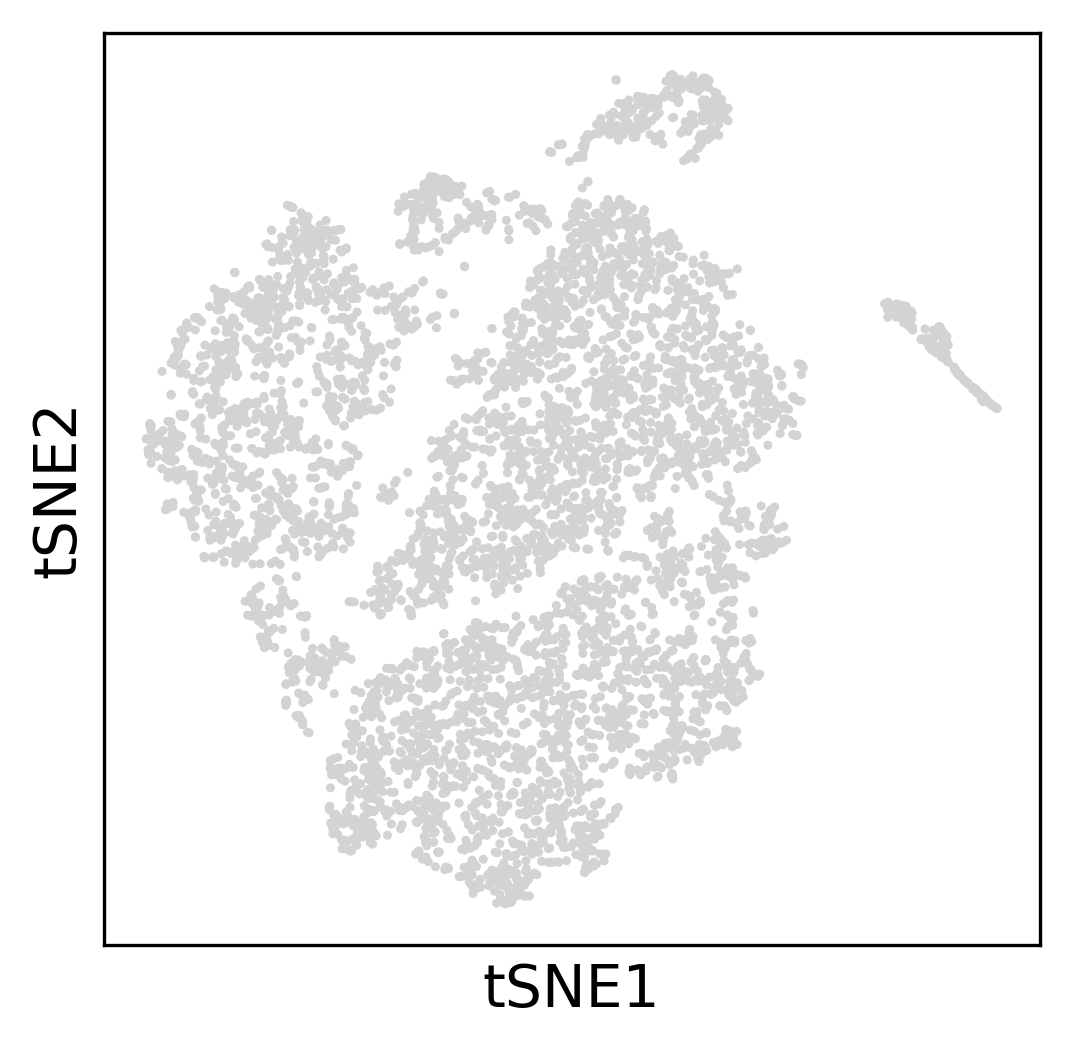

In [7]:
#generating tSNE plots
sc.tl.tsne(ge_emVE)
sc.settings.set_figure_params(dpi=150)
sc.pl.tsne(ge_emVE)

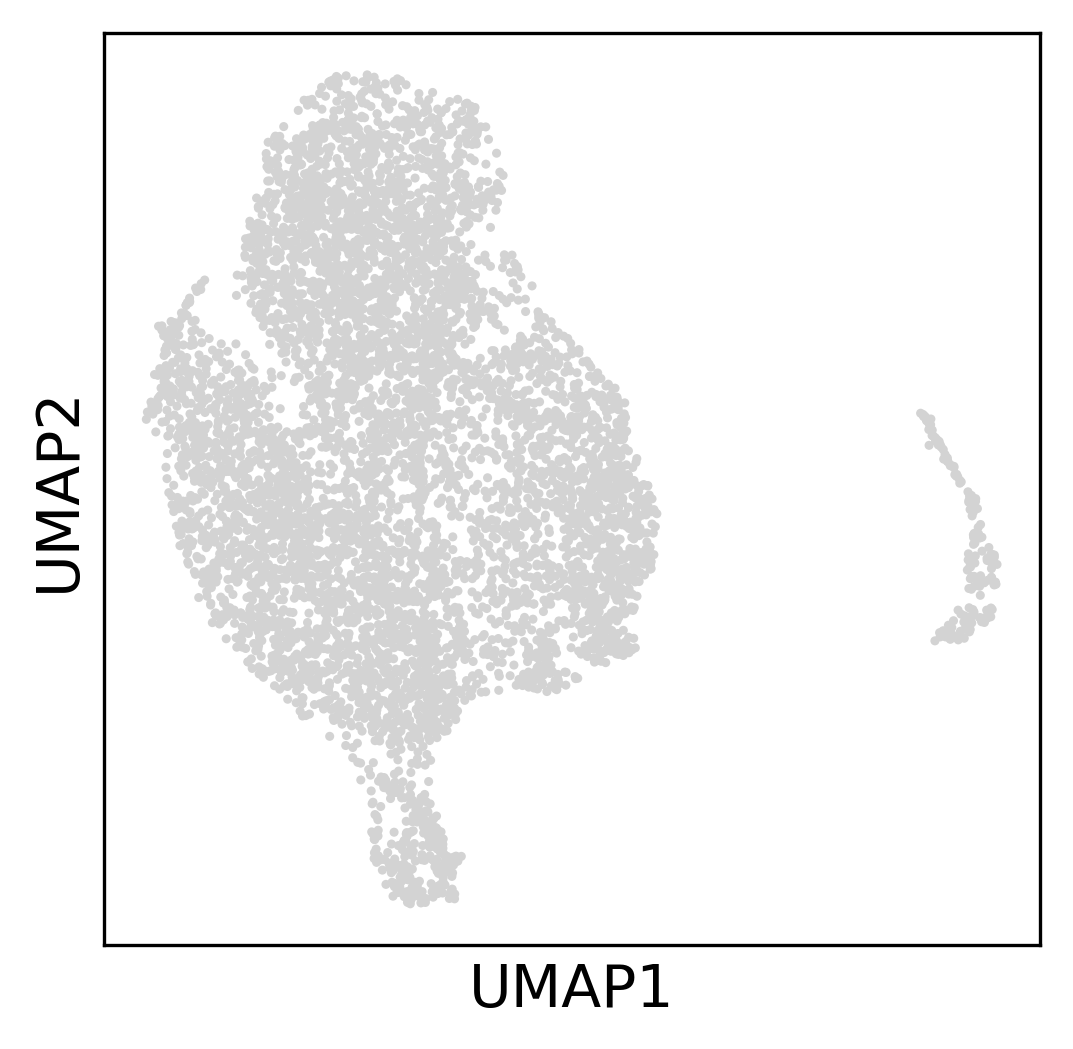

In [8]:
#generating plots with UMAP
sc.tl.umap(ge_emVE)
sc.settings.set_figure_params(dpi=150)
sc.pl.umap(ge_emVE)


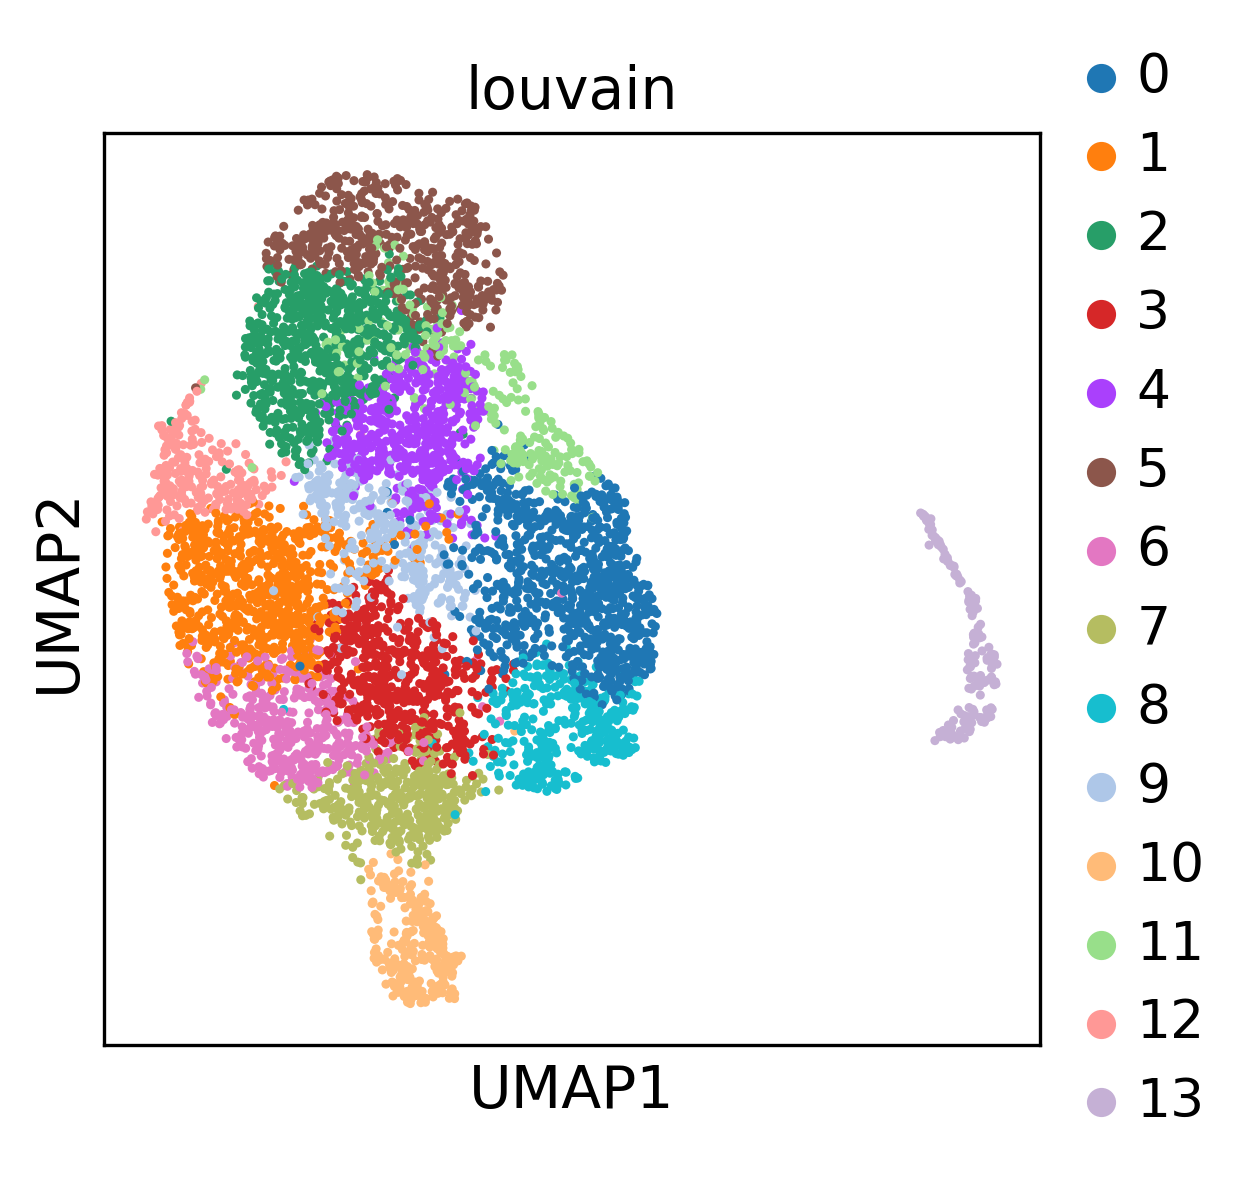

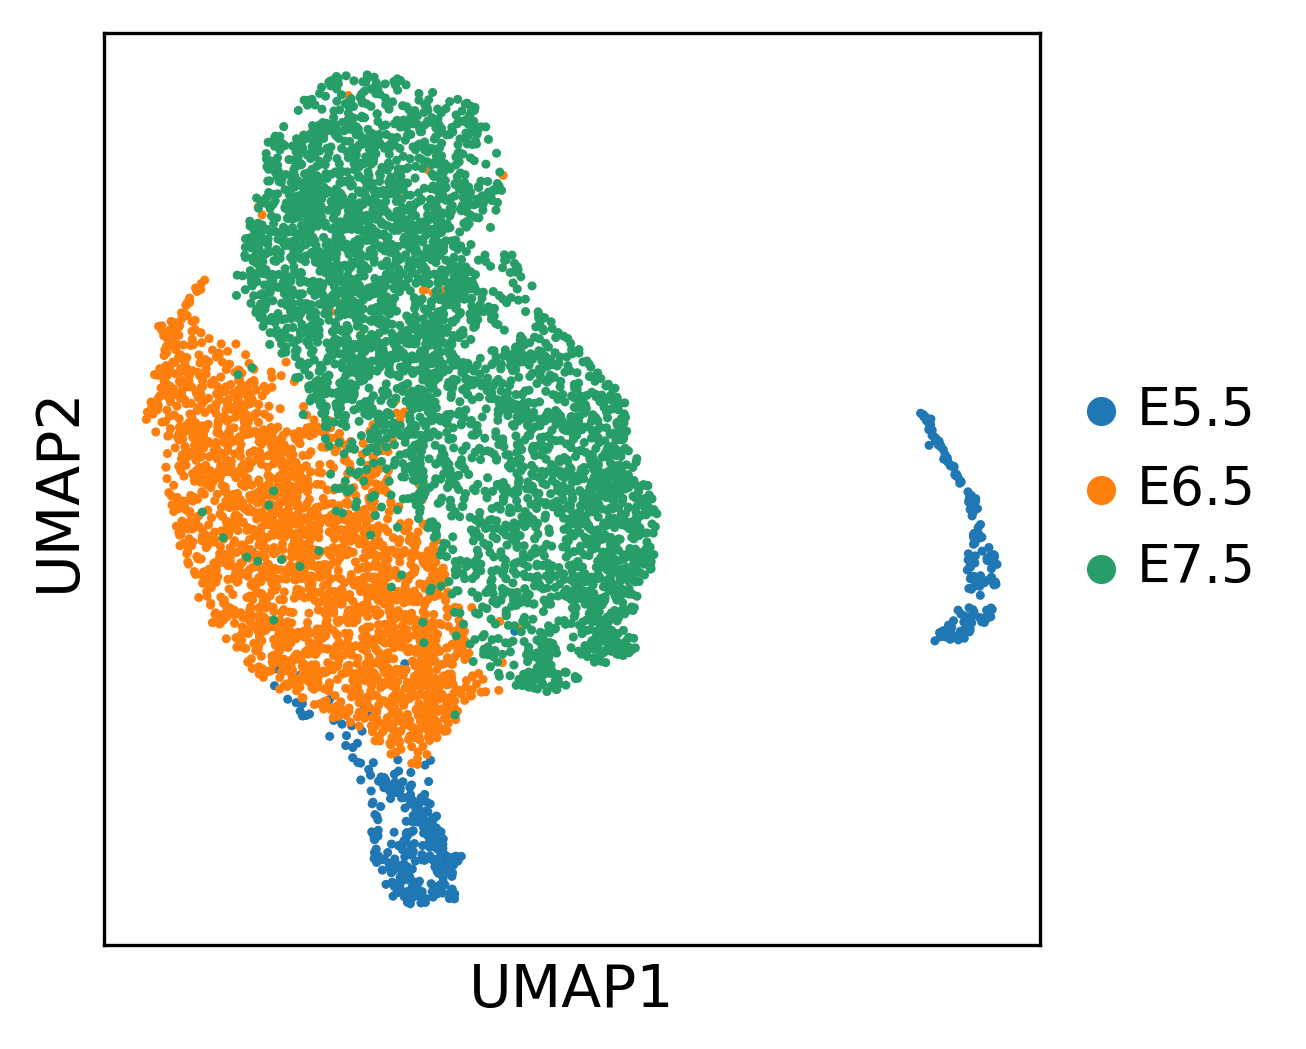

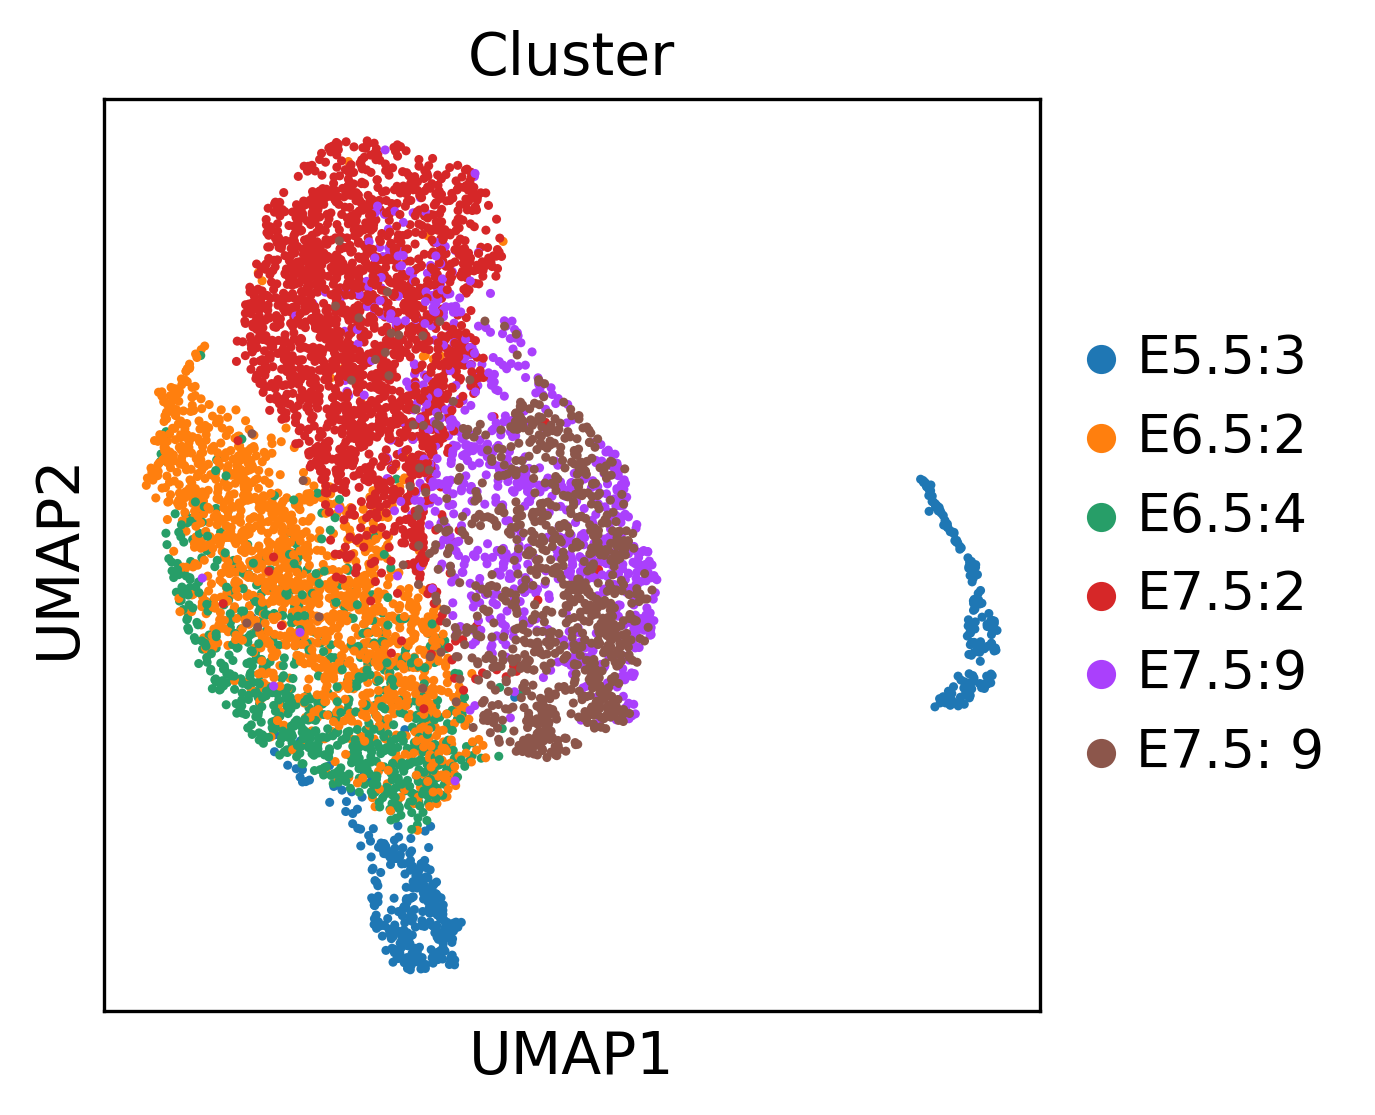

In [9]:
#generating plots with Louvain and UMAP
sc.tl.louvain(ge_emVE) 
sc.pl.umap(ge_emVE, color=['louvain']) 
sc.pl.umap(ge_emVE, title="", color=['Timepoint'])
sc.pl.umap(ge_emVE, color=['Cluster'])



Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.3410663604736328 seconds
Jaccard graph constructed in 1.3544490337371826 seconds
Wrote graph to binary file in 0.621861457824707 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.813775
After 4 runs, maximum modularity is Q = 0.815832
Louvain completed 24 runs in 4.848620653152466 seconds
PhenoGraph complete in 7.193694829940796 seconds


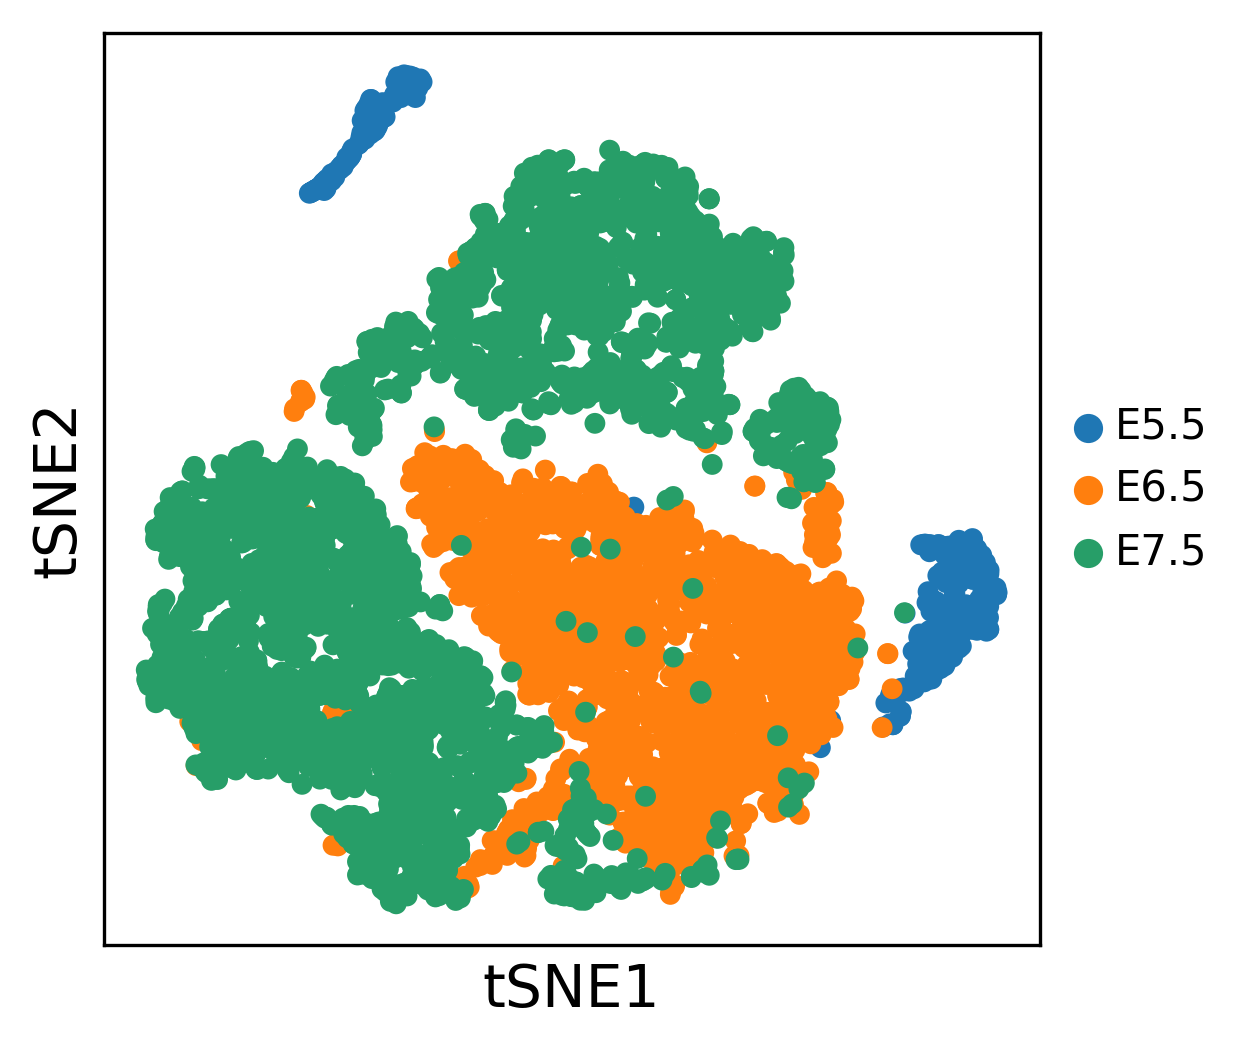

In [15]:
#exVE tSNE with phenograph implementation
result = sc.external.tl.phenograph(ge_emVE.obsm['X_pca'], k = 30) #compute phenograph clusters
sc.tl.tsne(ge_emVE, random_state = 7)
sc.pl.tsne(ge_emVE, title="", color = ['Timepoint'], s = 100, palette = sc.pl.palettes.vega_20_scanpy, legend_fontsize = 10)

In [10]:
#clustering with exVE cells
#computing neighborhood graph

sc.tl.pca(ge_exVE, svd_solver='arpack')
sc.pp.neighbors(ge_exVE, n_neighbors=15, n_pcs=25)
sc.pp.scale(ge_exVE, max_value=10)

/home/juanthe3_gmail_com/anaconda3/envs/genomics/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/genomics/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/juanthe3_gmail_com/anaconda3/envs/genomics/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..

... storing 'Cluster' as categorical
... storing 'Timepoint' as categorical
... storing 'CellType' as categorical


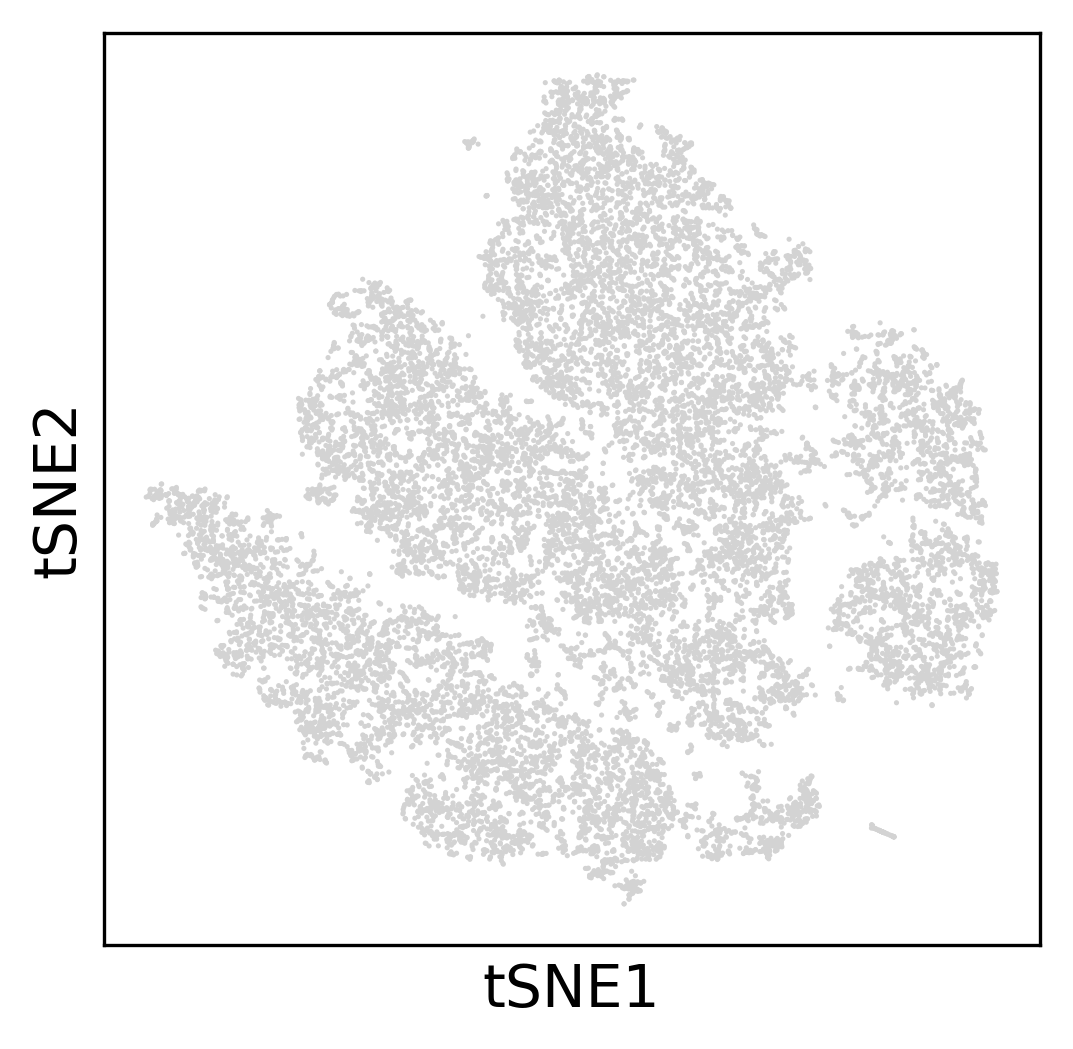

In [11]:
#generating tSNE plots
sc.tl.tsne(ge_exVE)
sc.settings.set_figure_params(dpi=150)
sc.pl.tsne(ge_exVE)

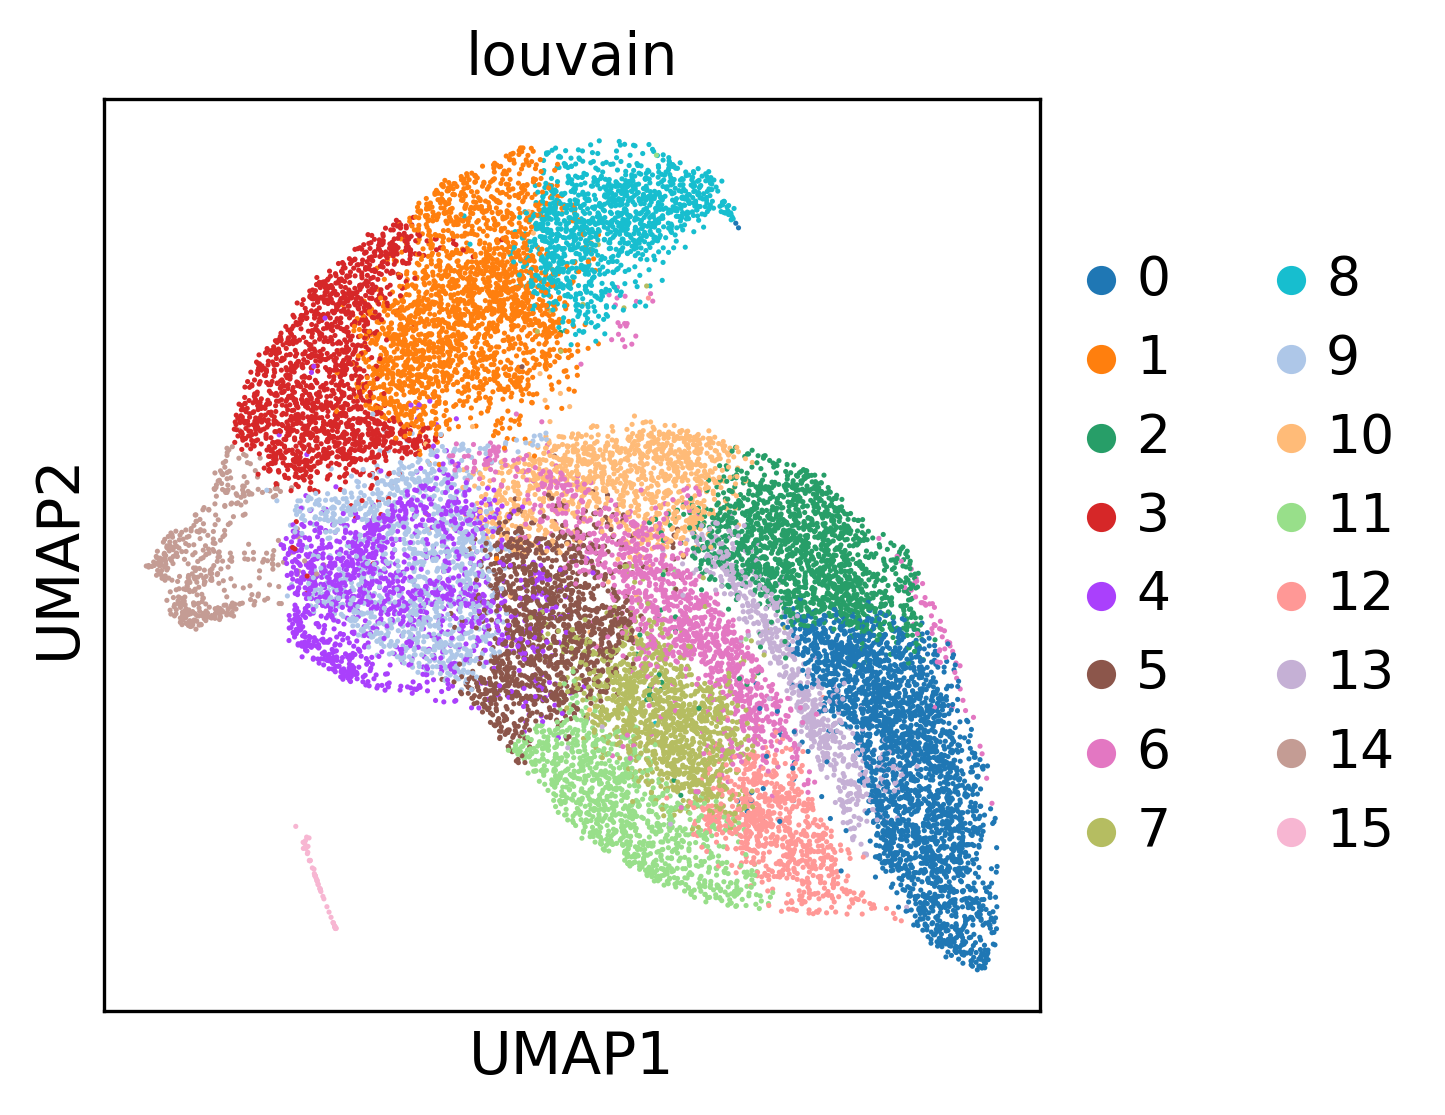

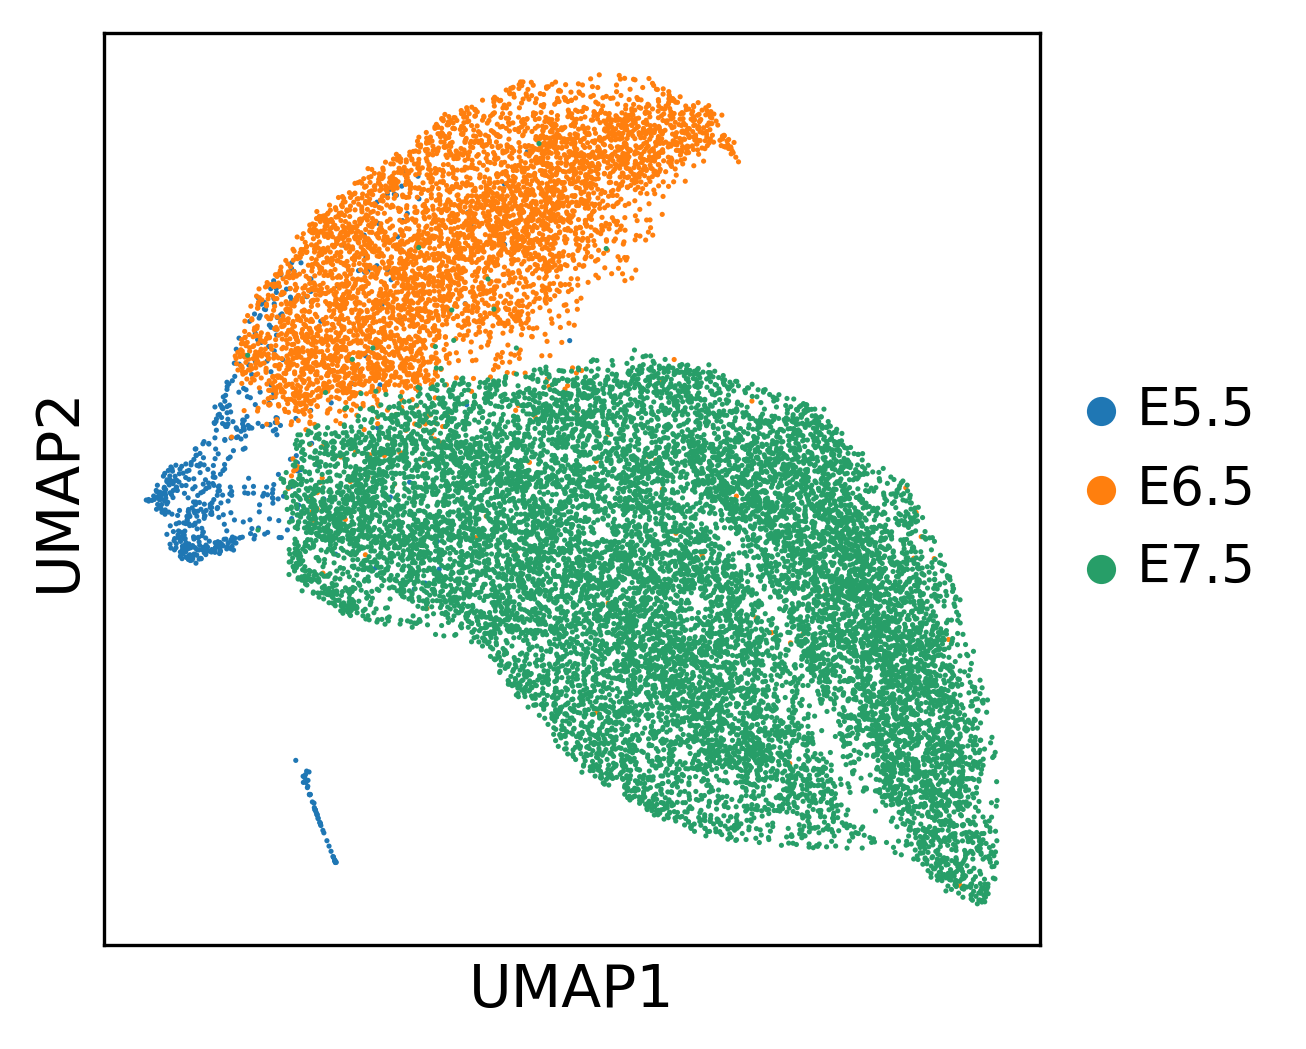

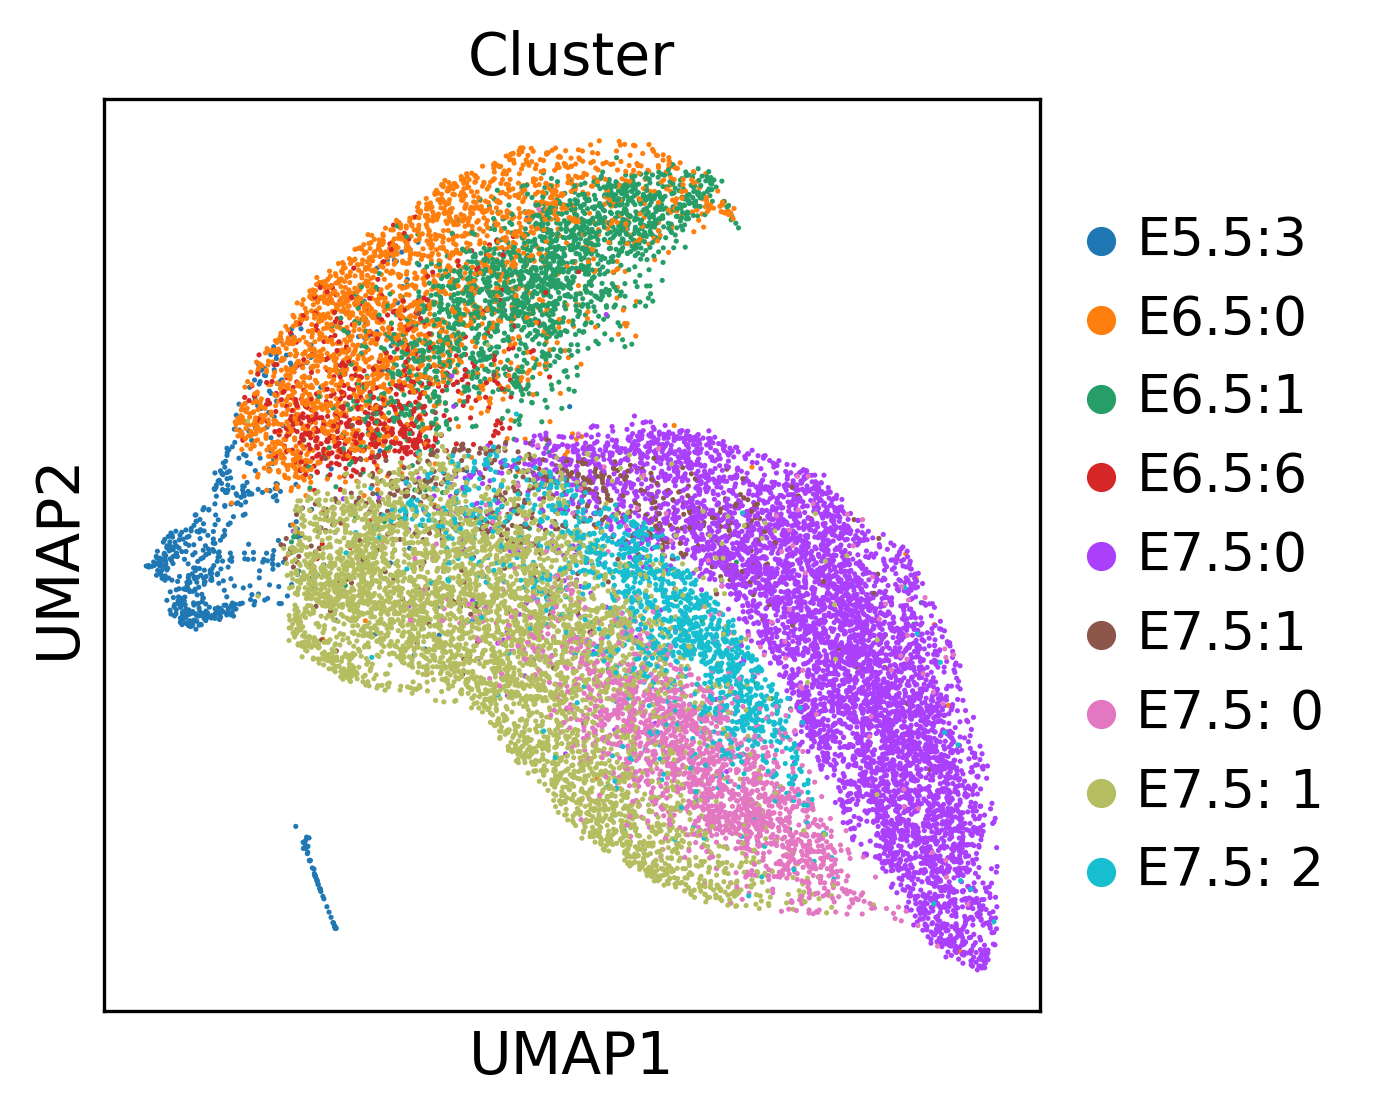

In [12]:
#generating plots with UMAP and Louvain
sc.tl.umap(ge_exVE)
sc.settings.set_figure_params(dpi=150)


sc.tl.louvain(ge_exVE)


sc.pl.umap(ge_exVE, color=['louvain'])
sc.pl.umap(ge_exVE, title="", color=['Timepoint'])
sc.pl.umap(ge_exVE, color=['Cluster'])

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 4.555629014968872 seconds
Jaccard graph constructed in 2.9979071617126465 seconds
Wrote graph to binary file in 2.4927737712860107 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.830501
After 2 runs, maximum modularity is Q = 0.83354
After 7 runs, maximum modularity is Q = 0.834575
After 14 runs, maximum modularity is Q = 0.835759
Louvain completed 34 runs in 21.946332454681396 seconds
PhenoGraph complete in 32.068684577941895 seconds


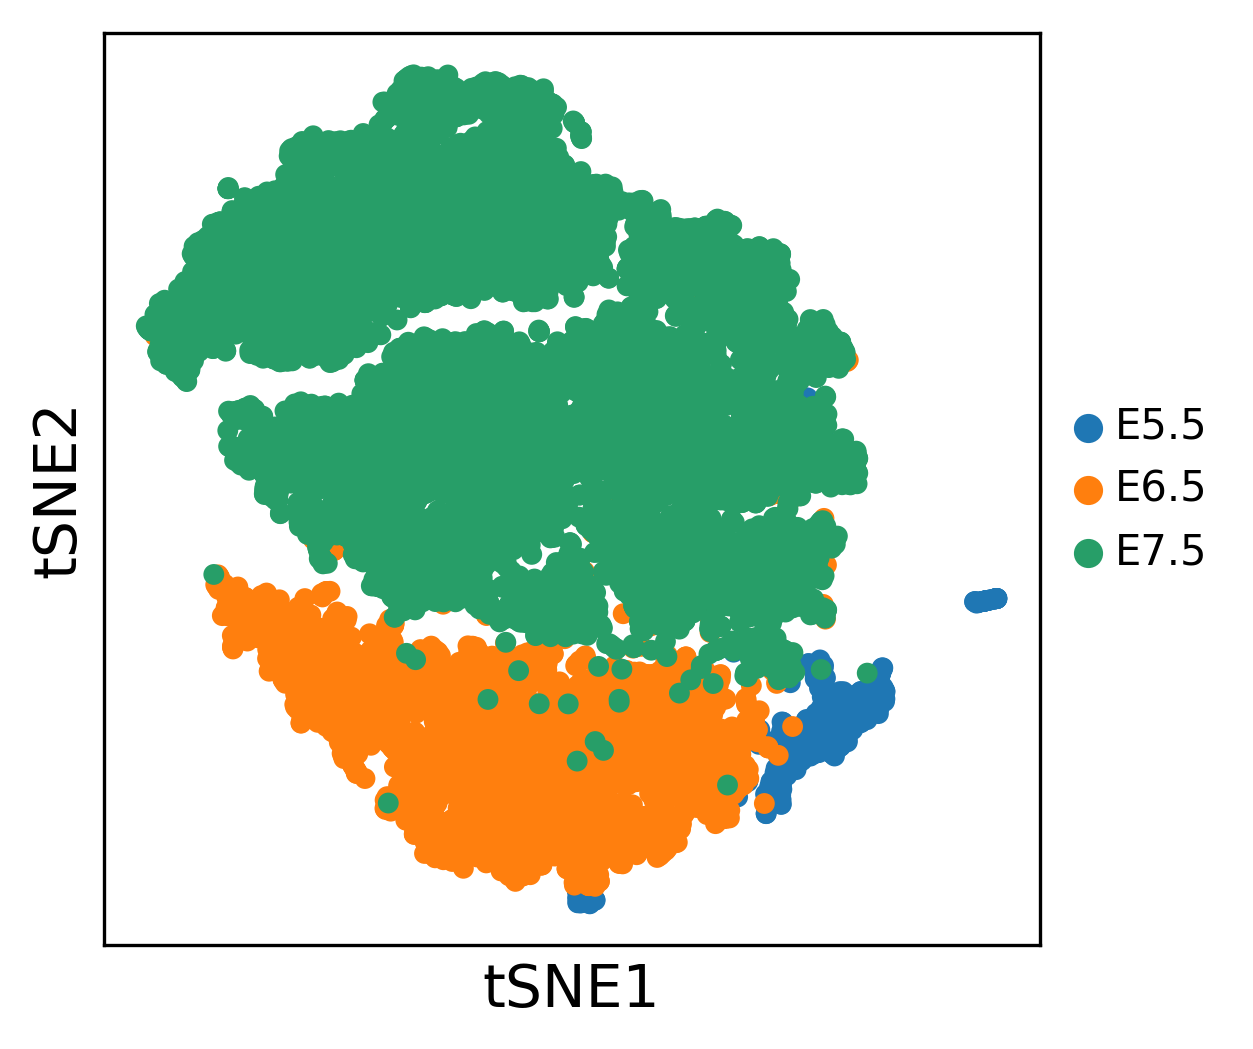

In [14]:
#exVE tSNE with phenograph implementation
result = sc.external.tl.phenograph(ge_exVE.obsm['X_pca'], k = 30) #compute phenograph clusters
sc.tl.tsne(ge_exVE, random_state = 7)
sc.pl.tsne(ge_exVE, title="", color = ['Timepoint'], s = 100, palette = sc.pl.palettes.vega_20_scanpy, legend_fontsize = 10)

In [22]:
#generating table showing ranked gene expression in emVE and exVE cell groups ordered by timepoint
sc.tl.rank_genes_groups(ge_emVE, 'Timepoint', method='t-test')
sc.tl.rank_genes_groups(ge_exVE, 'Timepoint', method='t-test')

pd.DataFrame(ge_emVE.uns['rank_genes_groups']['names']).head(20)
#emVE cell table

E5.5           E6.5     E7.5
0    Dppa5a          Gstp1   Eef1a1
1      Irs4          Taf10  mt-Atp6
2     Aplp2        Gm10020    Krt18
3     Eomes        Gm10076   mt-Co3
4      Scd2       Slc25a33  mt-Cytb
5     Foxq1        Cyp26a1   mt-Nd4
6     Sfrp1           Fgf5     Bex1
7      Fzd5            Erh   Slc2a1
8      Fgf5           Gclm      Bsg
9      Cdh2        Gm10131      Emb
10     Lrp2          Mixl1  Selenop
11  Gm10837          Eomes     Wbp5
12     Sox3           Pgk1  Cox7a2l
13   Atp8a1         Gm8186    H3f3a
14     Ntn1        Timm8a1   mt-Nd2
15    Dppa3           Fgf8   mt-Co2
16  Gm42418          Nodal    Cldn6
17     Nid1          Zbed5  Gm11808
18   Pmepa1  1810009A15Rik    Rpl14
19  Cyp26a1          Rpl29     Krt8

In [23]:
#exVE table
pd.DataFrame(ge_exVE.uns['rank_genes_groups']['names']).head(20)

E5.5           E6.5        E7.5
0    Dppa5a        Gm10076      mt-Nd4
1      Scd2           Pgk1     mt-Atp6
2      Srgn        Gm10020     mt-Cytb
3      Ldlr          Taf10      mt-Nd2
4   Gm10837         Gm8186      mt-Co3
5    Pou5f1        Gm10131      mt-Co2
6      Lrp2        Timm8a1        Apob
7      Zic3           Gclm      Rps3a1
8    Insig1       Pgk1-rs7       Wdr89
9      Fgf5        Tmem238         Emb
10     Has2        Gm10269         Rdx
11    Foxq1          Gstp1  Rpl23a-ps3
12   Pmepa1        Bloc1s1       Degs1
13     Cdh2          Zbed5       Hspa5
14     Utf1  1810009A15Rik      Slc2a3
15     Sqle        Dynlt1a     Slc13a4
16    Eomes           Aqp8      Eef1a1
17    Fads1         Gm4737        Calr
18     Irs4        Platr15      mt-Nd1
19   Dnmt3b          Chic2       Atp5b